In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

In [3]:
# copy the kaggle.json to folder created
! cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/

In [4]:
# - permision for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
100% 98.8M/98.8M [00:03<00:00, 45.6MB/s]
100% 98.8M/98.8M [00:03<00:00, 31.9MB/s]


In [6]:
! unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [7]:
!pip install scikit-learn==1.5.2


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
train_data = pd.read_csv('/content/mitbih_train.csv',header=None)
test_data = pd.read_csv('/content/mitbih_test.csv',header=None)
train_data.shape,test_data.shape

((87554, 188), (21892, 188))

In [10]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_data[187].unique()

array([0., 1., 2., 3., 4.])

In [12]:
# check null values
train_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [13]:
test_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [14]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Binary classification

In [15]:
y_train =train_data[187]
x_train= train_data.drop(187,axis=1)
y_test = test_data[187]
x_test= test_data.drop(187,axis=1)

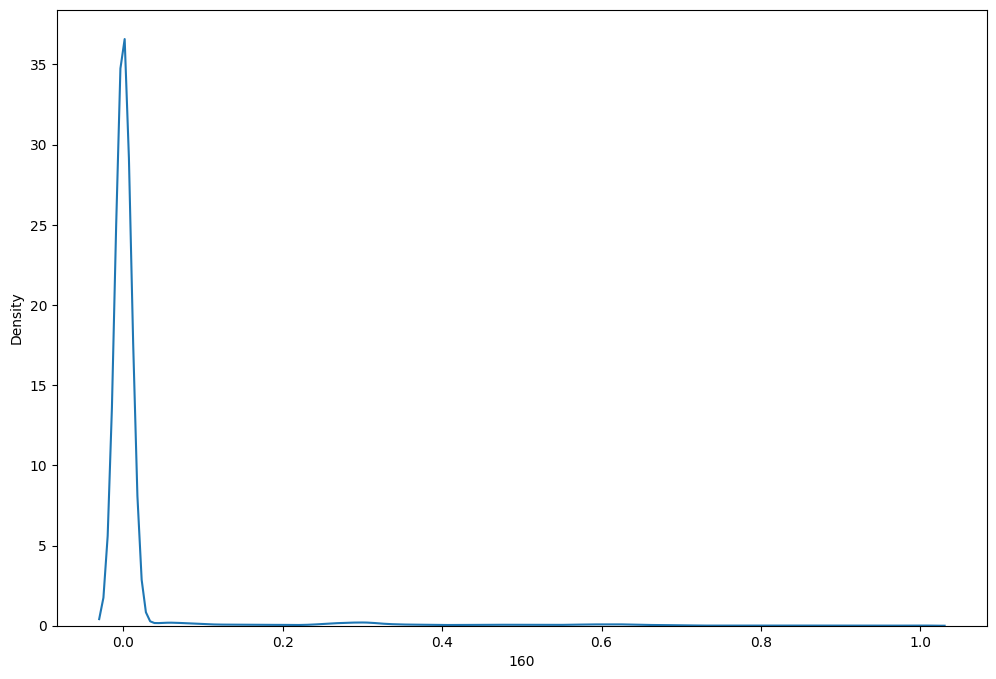

In [16]:
# visualize x_train['160']
fig,ax =plt.subplots (1,1 ,figsize=(12,8))
sns.kdeplot(x_train[160], ax=ax)
plt.show()

In [17]:
Y_train_b = np.where(train_data[187] == 0, 0, 1)
np.unique(Y_train_b)

array([0, 1])

In [18]:
Y_test_b = np.where(test_data[187] == 0, 0, 1).reshape(-1,1)

In [19]:
 # Drop the last 50 features (columns) in X_train and X_test
x_train = x_train.iloc[:, :-50]  # Drops the last 50 columns
x_test= x_test.iloc[:, :-50]    # Drops the last 50 columns

# Check the shapes to confirm the columns were dropped
print(f'X_train shape after dropping: {x_train.shape}')
print(f'X_test shape after dropping: {x_test.shape}')

X_train shape after dropping: (87554, 137)
X_test shape after dropping: (21892, 137)


In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Scale X_train and X_test
x_train= scaler.fit_transform(x_train)  # Fit to training data and transform it
x_test= scaler.transform(x_test)

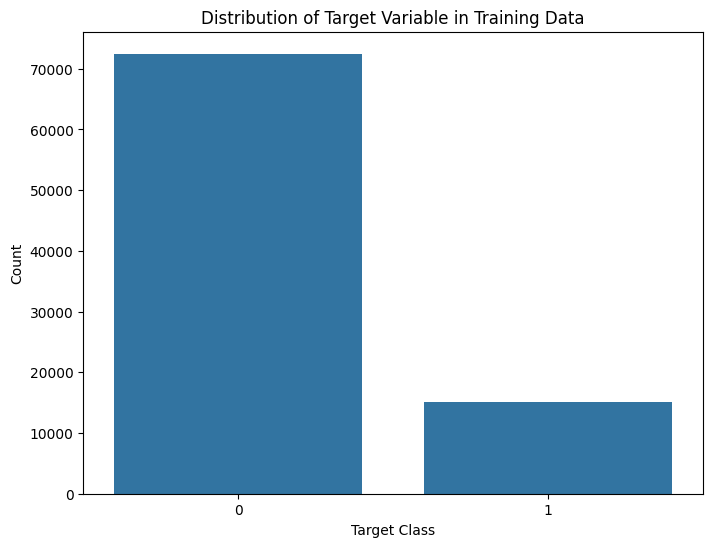

In [21]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=Y_train_b)
plt.title('Distribution of Target Variable in Training Data')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [22]:
Lr=LogisticRegression(class_weight='balanced',max_iter=1000)
Lr.fit(x_train,Y_train_b)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
y_pred=Lr.predict(x_test)

In [24]:
cm = confusion_matrix(Y_test_b,y_pred)

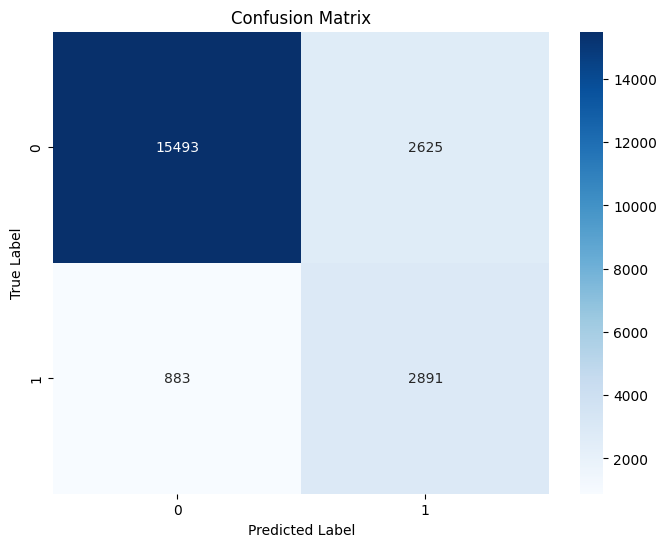

In [25]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test_b), yticklabels=np.unique(Y_test_b))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
print(classification_report(Y_test_b, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     18118
           1       0.52      0.77      0.62      3774

    accuracy                           0.84     21892
   macro avg       0.74      0.81      0.76     21892
weighted avg       0.87      0.84      0.85     21892



### Multi class

### XGboost model

In [27]:
import xgboost as xgb

params = {
    'objective': 'multi:softmax',  # Use multi-class softmax
    'num_class': len(set(y_train)),  # Set the number of classes
    'max_depth': 6,
    'eta': 0.3,
    'seed': 42
}

# Filter out the samples where y_train is not equal to 0
X_train_multiclass = x_train[y_train != 0]
y_train_multiclass = y_train[y_train != 0]

# Filter out the samples where y_test is not equal to 0 for the test set
X_test_multiclass = x_test[y_test != 0]
y_test_multiclass = y_test[y_test != 0]

# Adjust the labels to start from 0
y_train_multiclass = y_train_multiclass - 1
y_test_multiclass = y_test_multiclass - 1

# Create DMatrix
dtrain = xgb.DMatrix(X_train_multiclass, label=y_train_multiclass)
dtest = xgb.DMatrix(X_test_multiclass, label=y_test_multiclass)
# Train the model
bst = xgb.train(params, dtrain, num_boost_round=10)

In [28]:
# Make predictions on the test set
preds = bst.predict(dtest)

In [29]:
print(classification_report(y_test_multiclass, preds))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       556
         1.0       0.95      0.97      0.96      1448
         2.0       0.83      0.81      0.82       162
         3.0       0.98      0.99      0.98      1608

    accuracy                           0.96      3774
   macro avg       0.93      0.92      0.92      3774
weighted avg       0.96      0.96      0.96      3774



### Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_multiclass, y_train_multiclass)


RandomForestClassifier(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_multiclass)


In [32]:
print(classification_report(y_test_multiclass, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       556
         1.0       0.95      0.98      0.96      1448
         2.0       0.84      0.80      0.82       162
         3.0       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.94      0.92      0.93      3774
weighted avg       0.97      0.97      0.97      3774



### XGClassifier

In [33]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model to training data

xgb_clf.fit(X_train_multiclass, y_train_multiclass)

# Predict on test data
y_pred_test = xgb_clf.predict(X_test_multiclass)
y_pred_train = xgb_clf.predict(X_train_multiclass)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
print(f"classification report on train dataset{classification_report(y_train_multiclass, y_pred_train)}")
print(f"classification report on test dataset{classification_report(y_test_multiclass, y_pred_test)}")

classification report on train dataset              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2223
         1.0       1.00      1.00      1.00      5788
         2.0       1.00      1.00      1.00       641
         3.0       1.00      1.00      1.00      6431

    accuracy                           1.00     15083
   macro avg       1.00      1.00      1.00     15083
weighted avg       1.00      1.00      1.00     15083

classification report on test dataset              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       556
         1.0       0.96      0.98      0.97      1448
         2.0       0.86      0.89      0.87       162
         3.0       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.95      0.95      0.95      3774
weighted avg       0.97      0.97      0.97      3774



### Saving Best models

In [35]:
import pickle

model1 = Lr  # binary classification model
model2 = xgb_clf #  XGBoost model
scal = scaler # scaler

# Save each modele in one file
file1_name = 'logistc.sav'
file2_name = 'xgboost.sav'
file3_name = 'scaler.sav'

# Save each model to a different file
pickle.dump(model1, open(file1_name, 'wb'))
pickle.dump(model2, open(file2_name, 'wb'))
pickle.dump(scal, open(file3_name, 'wb'))
